In [2]:
import pandas as pd

In [3]:
olympics_df = pd.read_csv("athlete_events.csv")

In [4]:
comparisons = olympics_df[["NOC", "Medal", "Year"]].copy()
comparisons

NOC Medal  Year
0       CHN   NaN  1992
1       CHN   NaN  2012
2       DEN   NaN  1920
3       DEN  Gold  1900
4       NED   NaN  1988
...     ...   ...   ...
271111  POL   NaN  1976
271112  POL   NaN  2014
271113  POL   NaN  2014
271114  POL   NaN  1998
271115  POL   NaN  2002

[271116 rows x 3 columns]

In [14]:
comparisons_swe_fin = comparisons.loc[(comparisons["NOC"]=="SWE") | (comparisons["NOC"]=="FIN")]
comparisons_swe_fin = comparisons_swe_fin.dropna()

(<Figure size 432x288 with 3 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

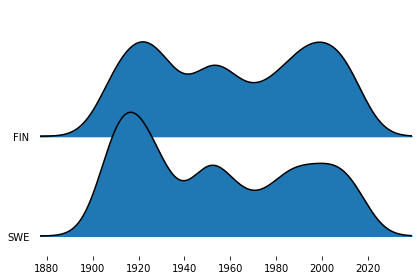

In [15]:
import joypy

joypy.joyplot(comparisons_swe_fin, by="NOC", column = "Year")

In [45]:
import requests

url = "https://www.erikliljeroth.se/api/alldata"

response = requests.get(url)

In [88]:
comparisons_swe_fin

NOC   Medal  Year
37      FIN  Bronze  1920
38      FIN  Bronze  1920
40      FIN  Bronze  2014
41      FIN  Bronze  1948
42      FIN    Gold  1948
...     ...     ...   ...
267108  SWE  Bronze  2004
267675  SWE  Silver  1912
267677  SWE  Bronze  1920
268632  SWE    Gold  2006
268634  SWE  Silver  2014

[2436 rows x 3 columns]

In [ ]:
comparisons_swe_fin

In [46]:
print(response.json())

[{'dtg': '2020-03-29 23:00:01', 'temperature': 2.99, 'humidity': 44.3, 'sensor_id': 949044086}, {'dtg': '2020-03-29 23:30:02', 'temperature': 2.49, 'humidity': 45.72, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:00:02', 'temperature': 2.43, 'humidity': 45.4, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:30:02', 'temperature': 2.52, 'humidity': 48.45, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:00:02', 'temperature': 2.62, 'humidity': 49.99, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:30:01', 'temperature': 2.79, 'humidity': 49.62, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:00:02', 'temperature': 3.02, 'humidity': 52.07, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:30:02', 'temperature': 3.2, 'humidity': 55.57, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:00:02', 'temperature': 3.38, 'humidity': 59.15, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:30:01', 'temperature': 3.67, 'humidity': 59.89, 'sensor_id': 949044086}, {'dtg': '2020-03-30 04:00:01', 'temperatur

In [47]:
print(response.json()[0]["temperature"])

2.99


In [48]:
temperature_list = []
date_list = []
for entry in response.json():
    temperature_list.append(entry["temperature"])
    date_list.append(entry["dtg"])
print(len(temperature_list), len(date_list))

26017 26017


In [49]:
print(type(temperature_list[0]))

<class 'float'>


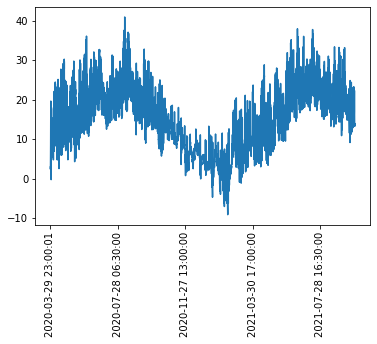

In [64]:
import matplotlib.pyplot as plt

plt.plot(temperature_list)
plt.xticks(range(len(temperature_list))[::1440*4], date_list[::1440*4], rotation=90);

In [66]:
with open("cool_data.txt", "w+") as f:
    f.writelines(str(response.json()))

In [84]:
with open("cool_data.txt", "r") as f:
    cool_data = json.load(f)

print(type(cool_data[0]), len(cool_data))

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 3 (char 2)

In [77]:
print(cool_data[0])

[{'dtg': '2020-03-29 23:00:01', 'temperature': 2.99, 'humidity': 44.3, 'sensor_id': 949044086}, {'dtg': '2020-03-29 23:30:02', 'temperature': 2.49, 'humidity': 45.72, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:00:02', 'temperature': 2.43, 'humidity': 45.4, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:30:02', 'temperature': 2.52, 'humidity': 48.45, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:00:02', 'temperature': 2.62, 'humidity': 49.99, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:30:01', 'temperature': 2.79, 'humidity': 49.62, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:00:02', 'temperature': 3.02, 'humidity': 52.07, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:30:02', 'temperature': 3.2, 'humidity': 55.57, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:00:02', 'temperature': 3.38, 'humidity': 59.15, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:30:01', 'temperature': 3.67, 'humidity': 59.89, 'sensor_id': 949044086}, {'dtg': '2020-03-30 04:00:01', 'temperatur

In [80]:
import json

with open("cool_data_2.txt", "w+") as f:
    json.dump(response.json(), f)

In [85]:
with open("cool_data_2.txt", "r") as f:
    cool_data = json.load(f)

print(type(cool_data[0]))

<class 'dict'>


In [87]:
cool_data[0]["temperature"]

2.99